## Final Project Submission

Please fill out:
* Student name: Charles Ndegwa
* Student pace: self paced / part time 
* Scheduled project review date/time: 
* Instructor name: 


In [302]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [303]:
filepath ='/Users/ndegwa/Documents/GitHub/Phase/data'

In [304]:
#start by opening a connection to the database with sqlite3.connect
conn = sqlite3.connect(f'{filepath}/im.db')

In [305]:
#cursor object to exucute SQL commands
cur = conn.cursor()

In [306]:
# special query for finding the table names
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [307]:
#show all information about the movie_basics table
cur.execute("""SELECT * FROM movie_basics;""").fetchall()

[('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama'),
 ('tt0066787',
  'One Day Before the Rainy Season',
  'Ashad Ka Ek Din',
  2019,
  114.0,
  'Biography,Drama'),
 ('tt0069049',
  'The Other Side of the Wind',
  'The Other Side of the Wind',
  2018,
  122.0,
  'Drama'),
 ('tt0069204',
  'Sabse Bada Sukh',
  'Sabse Bada Sukh',
  2018,
  None,
  'Comedy,Drama'),
 ('tt0100275',
  'The Wandering Soap Opera',
  'La Telenovela Errante',
  2017,
  80.0,
  'Comedy,Drama,Fantasy'),
 ('tt0111414', 'A Thin Life', 'A Thin Life', 2018, 75.0, 'Comedy'),
 ('tt0112502', 'Bigfoot', 'Bigfoot', 2017, None, 'Horror,Thriller'),
 ('tt0137204',
  'Joe Finds Grace',
  'Joe Finds Grace',
  2017,
  83.0,
  'Adventure,Animation,Comedy'),
 ('tt0139613', 'O Silêncio', 'O Silêncio', 2012, None, 'Documentary,History'),
 ('tt0144449',
  'Nema aviona za Zagreb',
  'Nema aviona za Zagreb',
  2012,
  82.0,
  'Biography'),
 ('tt0146592', 'Pál Adrienn', 'Pál Adrienn', 2010, 136.0, 'Drama'),
 ('tt

In [308]:
#only run after above code to get column names of select table
cur.description

(('movie_id', None, None, None, None, None, None),
 ('primary_title', None, None, None, None, None, None),
 ('original_title', None, None, None, None, None, None),
 ('start_year', None, None, None, None, None, None),
 ('runtime_minutes', None, None, None, None, None, None),
 ('genres', None, None, None, None, None, None))

In [309]:
#show all information about the movie_ratings table
cur.execute("""SELECT * FROM movie_ratings;""").fetchall()

[('tt10356526', 8.3, 31),
 ('tt10384606', 8.9, 559),
 ('tt1042974', 6.4, 20),
 ('tt1043726', 4.2, 50352),
 ('tt1060240', 6.5, 21),
 ('tt1069246', 6.2, 326),
 ('tt1094666', 7.0, 1613),
 ('tt1130982', 6.4, 571),
 ('tt1156528', 7.2, 265),
 ('tt1161457', 4.2, 148),
 ('tt1171222', 5.1, 8296),
 ('tt1174693', 5.8, 2381),
 ('tt1181840', 7.0, 5494),
 ('tt1193623', 8.0, 5),
 ('tt1199588', 5.5, 74),
 ('tt1204784', 5.8, 6),
 ('tt1210166', 7.6, 326657),
 ('tt1212419', 6.5, 87288),
 ('tt1220911', 5.0, 941),
 ('tt1229238', 7.4, 428142),
 ('tt1232829', 7.2, 477771),
 ('tt1235548', 6.6, 2725),
 ('tt1243974', 5.4, 54646),
 ('tt1250861', 6.2, 416),
 ('tt1258812', 4.0, 21),
 ('tt1261945', 4.4, 69199),
 ('tt1266037', 7.0, 1413),
 ('tt1270291', 5.8, 5728),
 ('tt1270761', 5.6, 44490),
 ('tt1272886', 6.1, 6688),
 ('tt1274297', 5.4, 381),
 ('tt1283887', 5.4, 2527),
 ('tt1285219', 3.4, 387),
 ('tt1287879', 7.7, 76),
 ('tt1290476', 7.2, 6),
 ('tt1294141', 4.5, 113),
 ('tt1320239', 6.2, 18431),
 ('tt1322312', 6.3

In [310]:
#only run after above code to get column names of select table
cur.description

(('movie_id', None, None, None, None, None, None),
 ('averagerating', None, None, None, None, None, None),
 ('numvotes', None, None, None, None, None, None))

In [311]:
#express the result of sql query in a DataFrame
pd.DataFrame(
    # Execute the SQL query to select rows from movie_ratings WHERE numvotes > 10000 AND averagerating > 7.0
    cur.execute("""SELECT * FROM movie_ratings WHERE numvotes > 10000 AND averagerating > 7.0""").fetchall(),
     columns=[x[0] for x in cur.description])

,movie_id,averagerating,numvotes
0,tt1210166,7.6,326657
1,tt1229238,7.4,428142
2,tt1232829,7.2,477771
3,tt1403981,7.1,129443
4,tt1535109,7.8,387402
...,...,...,...
869,tt2205697,7.2,78903
870,tt2234003,7.4,52266
871,tt2386490,7.6,60769
872,tt2404461,7.8,41191


In [312]:
# Execute the SQL query to select rows from movie_ratings where numvotes > 10000 and averagerating > 7.0
query = """
SELECT movie_ratings.*, movie_basics.primary_title, movie_basics.original_title, 
       movie_basics.start_year, movie_basics.runtime_minutes, movie_basics.genres
FROM movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id = movie_basics.movie_id
WHERE movie_ratings.numvotes > 10000 AND movie_ratings.averagerating > 7.0
"""

In [313]:
# Fetch the data and create a DataFrame
df = pd.DataFrame(cur.execute(query).fetchall(), columns=[x[0] for x in cur.description])
# View only the columns from 'movie_basics'
df_movie_basics = df[['primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']]
df_movie_basics

,primary_title,original_title,start_year,runtime_minutes,genres
0,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport"
1,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller"
2,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime"
3,Remember Me,Remember Me,2010,113.0,"Drama,Romance"
4,Captain Phillips,Captain Phillips,2013,134.0,"Biography,Drama,Thriller"
...,...,...,...,...,...
869,Stuck in Love.,Stuck in Love.,2012,97.0,"Comedy,Drama,Romance"
870,Calvary,Calvary,2014,102.0,Drama
871,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019,104.0,"Action,Adventure,Animation"
872,The Past,Le passé,2013,130.0,"Drama,Mystery"


In [314]:
# Create an empty list to store the new rows
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df_movie_basics.iterrows():
    # Split the 'genres' string by comma and iterate over the resulting list
    for genre in row['genres'].split(','):
        # Create a new row with the details from other columns and the current genre
        new_row = row.copy()
        new_row['genres'] = genre.strip()  # Strip leading/trailing whitespace
        new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_individual_genres = pd.DataFrame(new_rows)

# Print the new DataFrame
print(df_individual_genres)

                            primary_title  \
0                               Moneyball   
0                               Moneyball   
0                               Moneyball   
1    Mission: Impossible - Ghost Protocol   
1    Mission: Impossible - Ghost Protocol   
..                                    ...   
872                              The Past   
872                              The Past   
873                            The Insult   
873                            The Insult   
873                            The Insult   

                           original_title  start_year  runtime_minutes  \
0                               Moneyball        2011            133.0   
0                               Moneyball        2011            133.0   
0                               Moneyball        2011            133.0   
1    Mission: Impossible - Ghost Protocol        2011            132.0   
1    Mission: Impossible - Ghost Protocol        2011            132.0   
..             

In [315]:
print(df_individual_genres.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 873
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    2190 non-null   object 
 1   original_title   2190 non-null   object 
 2   start_year       2190 non-null   int64  
 3   runtime_minutes  2190 non-null   float64
 4   genres           2190 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 102.7+ KB
None


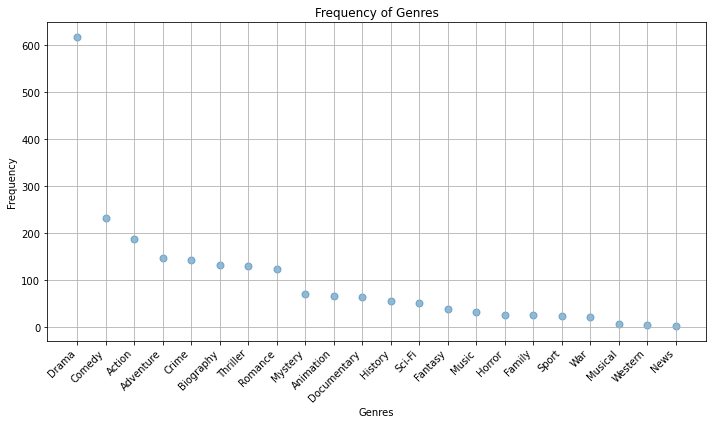

In [316]:
# Count the occurrences of each genre
genre_counts = df_individual_genres['genres'].value_counts()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(genre_counts.index, genre_counts.values, s=50, alpha=0.5)
plt.title('Frequency of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [317]:
#path to data files
filepath = "/Users/ndegwa/Documents/GitHub/Phase/data"

#read all dataset files
bom_movie_gross = pd.read_csv(f'{filepath}/bom.movie_gross.csv')
tmdb_movies = pd.read_csv(f'{filepath}/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv(f'{filepath}/tn.movie_budgets.csv')
rt_movie_info = pd.read_csv(f'{filepath}/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv(f'{filepath}/rt.reviews.tsv', sep='\t', encoding='latin1')


In [318]:
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [319]:
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [320]:
tmdb_movies.info

<bound method DataFrame.info of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-

In [321]:
tn_movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [322]:
rt_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [323]:
rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [324]:
# Displaying basic information about the selected DataFrame
print("Basic Info:")
tn_movie_budgets.info()


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [325]:
# Handling missing values
print("\nHandling Missing Values:")
tn_movie_budgets.isnull().sum()

# Handling duplicate rows
print("\nHandling Duplicate Rows:")
tn_movie_budgets = tn_movie_budgets.drop_duplicates()

# Summary statistics
print("\nSummary Statistics:")
tn_movie_budgets.describe()


Handling Missing Values:

Handling Duplicate Rows:

Summary Statistics:


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [326]:
# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [327]:
# Convert 'release_date' column to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

1. Production Budgets Analysis

In [328]:

# Summary statistics of production budgets
print("Production Budgets Summary Statistics:")
tn_movie_budgets['production_budget'].describe()

Production Budgets Summary Statistics:


count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

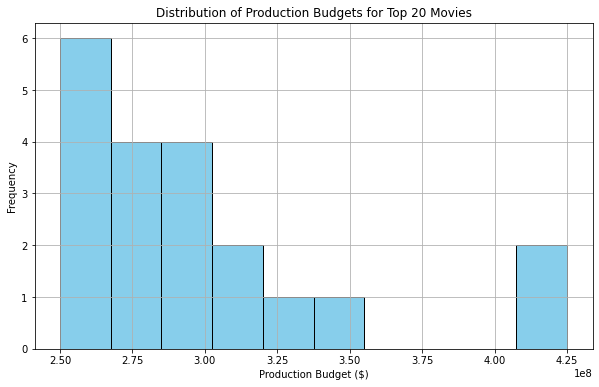

In [329]:
# Sort the DataFrame by production budget in descending order and select the top 50 movies
top_20_movies = tn_movie_budgets.nlargest(20, 'production_budget')

# Plot a histogram of the production budgets for the top 20 movies
plt.figure(figsize=(10, 6))
plt.hist(top_20_movies['production_budget'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Production Budgets for Top 20 Movies')
plt.xlabel('Production Budget ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


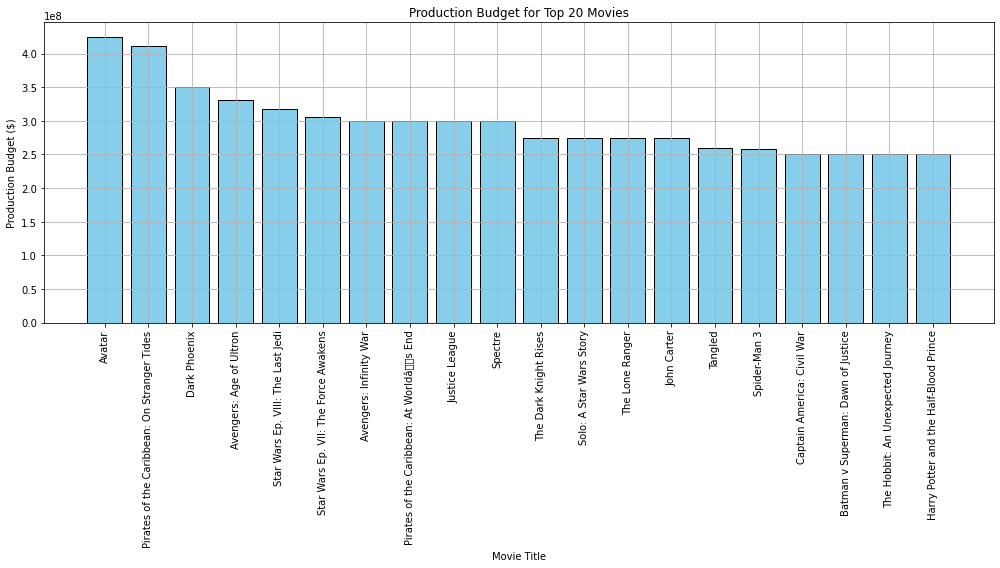

In [330]:
# Sort the DataFrame by production budget in descending order and select the top 20 movies
top_20_movies = tn_movie_budgets.nlargest(20, 'production_budget')

# Plot a bar chart of the production budgets for the top 20 movies
plt.figure(figsize=(14, 8))
plt.bar(top_20_movies['movie'], top_20_movies['production_budget'], color='skyblue', edgecolor='black')
plt.title('Production Budget for Top 20 Movies')
plt.xlabel('Movie Title')
plt.ylabel('Production Budget ($)')
plt.xticks(rotation=90, fontsize=10)  # Rotate movie titles for better readability
plt.grid(True)
plt.tight_layout()

# Set font family to a commonly available one that supports a wide range of characters
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.show()

 2.Domestic and Worldwide Gross Revenues Analysis

In [331]:
# Summary statistics of domestic gross revenues
print("\nDomestic Gross Summary Statistics:")
tn_movie_budgets['domestic_gross'].describe()



Domestic Gross Summary Statistics:


count    5.782000e+03
mean     4.187333e+07
std      6.824060e+07
min      0.000000e+00
25%      1.429534e+06
50%      1.722594e+07
75%      5.234866e+07
max      9.366622e+08
Name: domestic_gross, dtype: float64

In [332]:
#Summary statistics of Worldwide gross revenues
print("\nWorldwide Gross Summary Statistics:")
tn_movie_budgets['worldwide_gross'].describe()


Worldwide Gross Summary Statistics:


count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

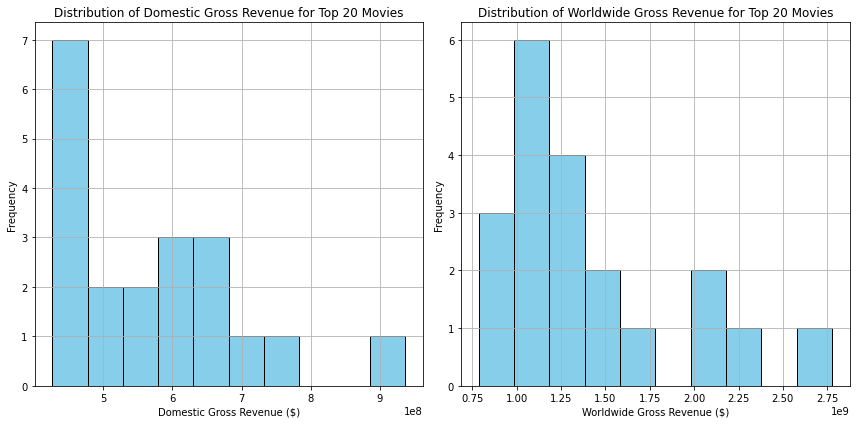

In [333]:
# Sort the DataFrame by domestic and worldwide gross revenues in descending order and select the top 20 movies
top_20_movies = tn_movie_budgets.nlargest(20, ['domestic_gross', 'worldwide_gross'])

# Plot histograms of domestic and worldwide gross revenues for the top 20 movies
plt.figure(figsize=(12, 6))

# Histogram of domestic gross revenue
plt.subplot(1, 2, 1)
plt.hist(top_20_movies['domestic_gross'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Domestic Gross Revenue for Top 20 Movies')
plt.xlabel('Domestic Gross Revenue ($)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram of worldwide gross revenue
plt.subplot(1, 2, 2)
plt.hist(top_20_movies['worldwide_gross'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Worldwide Gross Revenue for Top 20 Movies')
plt.xlabel('Worldwide Gross Revenue ($)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

3. Release Dates Analysis

In [334]:
# Extracting year and month from release_date
tn_movie_budgets['release_year'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.year
tn_movie_budgets['release_month'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.month_name()

In [335]:
# Convert release_date to datetime and extract release year
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'], errors='coerce')
tn_movie_budgets['release_year'] = tn_movie_budgets['release_date'].dt.year


In [336]:
# Counting the number of movies released each year
movies_per_year = tn_movie_budgets['release_year'].value_counts()

# Filtering years with more than 50 releases
years_with_more_than_50_releases = movies_per_year[movies_per_year > 50].index

# Filtering the DataFrame to include only those years
filtered_df = tn_movie_budgets[tn_movie_budgets['release_year'].isin(years_with_more_than_50_releases)]

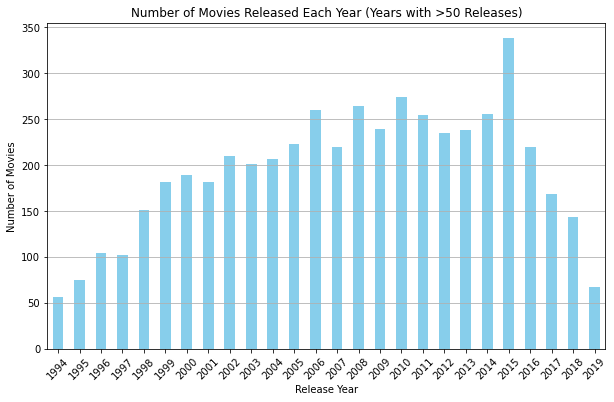

In [337]:

# Plotting number of movies released each year for years with more than 50 releases
plt.figure(figsize=(10, 6))
filtered_df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Year (Years with >50 Releases)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

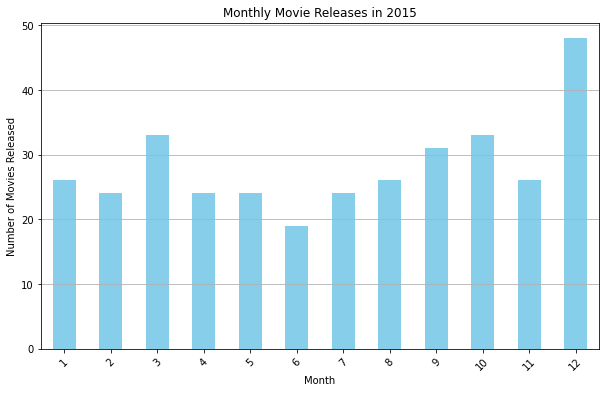

In [341]:

# Find the year with the most releases
most_releases_year = monthly_counts.sum(axis=1).idxmax()

# Plotting monthly movie releases for the year with the most releases
plt.figure(figsize=(10, 6))
monthly_counts.loc[most_releases_year].plot(kind='bar', color='skyblue')
plt.title(f'Monthly Movie Releases in {most_releases_year}')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

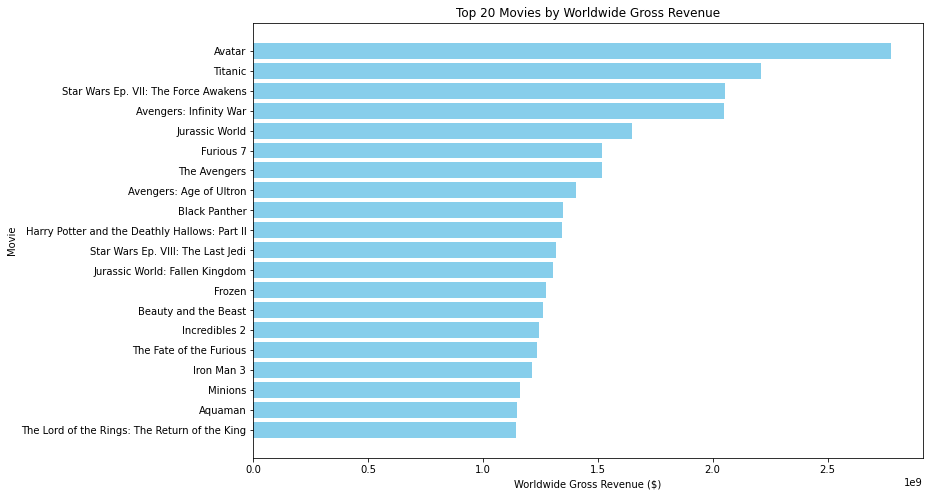

In [ ]:
# Sorting the DataFrame by worldwide gross revenue in descending order and selecting the top 20 movies
top_20_movies = tn_movie_budgets.nlargest(20, 'worldwide_gross')

# Creating a bar plot for the top 20 movies
plt.figure(figsize=(12, 8))
plt.barh(top_20_movies['movie'], top_20_movies['worldwide_gross'], color='skyblue')
plt.xlabel('Worldwide Gross Revenue ($)')
plt.ylabel('Movie')
plt.title('Top 20 Movies by Worldwide Gross Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest grossing movie at the top
plt.show()

From the above analysis the Drama genre is a huge contibutor to the movie production industry having a stake in almost all combination of movies produced.

As of 2015 the results show that movie have increased in production with most releases being after the 2nd half of the year.

From the World Gross Revenue it was noted that fiction movies have greatest impact and should be higly considered.